In [4]:
import glob
import numpy as np
from PIL import Image
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from clevr_dataset import *
%matplotlib inline

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# Plotting the images from their png file -> np array -> plt.imshow.
# path = '../../clevr-dataset-gen/output/'
# image_path = f"{path}images/"
# image_list = glob.glob(image_path + "*")
# for im_path in image_list:
#     pil_im = Image.open(im_path)
#     plt.imshow(np.asarray(pil_im))

In [3]:
# Getting the training mean, std values.
train_path = '../../clevr-dataset-gen/output/train/images/'
rgb_mean, rgb_std = calc_trainset_mean_std(train_path)


100%|██████████| 10000/10000 [08:04<00:00, 20.66it/s]


In [5]:
rgb_mean_copy = load_pickle("../pickle_files/rgb_mean.pickle")
rgb_std_copy = load_pickle("../pickle_files/rgb_std.pickle")

print(rgb_mean_copy)
print(rgb_std_copy)

[0.47035027 0.46635654 0.45921228]
[0.09705831 0.09378762 0.09461603]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([5, 3, 2])
tensor([3, 3, 2])
tensor([0, 3, 2])
tensor([3, 1, 3])


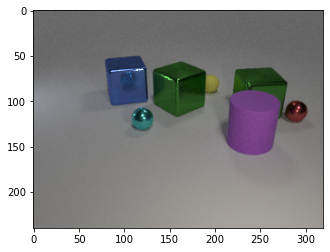

In [53]:
# Getting some images and labels from the trainloader and verifying them.
# Here, the images are un-standardized first.
im1, l1 = next(iter(clevr_dataloader))

output_path = '../../clevr-dataset-gen/output/'
clevr_dataset = CLEVRDataset(output_path)
clevr_dataloader = torch.utils.data.DataLoader(dataset=clevr_dataset, batch_size=4, shuffle=False)

for im, l in zip(im1, l1):
    x = im * rgb_std[:, None, None] + rgb_mean[:, None, None]
    plt.imshow(x.numpy().transpose(1,2,0))
    
    print(l)

In [14]:
# Getting the distribution of labels for each object.
cube_labels = [0] * 11
cylinder_labels = [0] * 11
sphere_labels = [0] * 11

In [11]:
train_dataset = CLEVRDataset('../../clevr-dataset-gen/output/')
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)

In [15]:
for i, (_, labels) in tqdm(enumerate(train_loader, 0)):
    lbl = labels.squeeze()
    cube_labels[lbl[0]] += 1
    cylinder_labels[lbl[1]] += 1
    sphere_labels[lbl[2]] += 1

2293it [02:20, 16.32it/s]


KeyboardInterrupt: 

In [16]:
print(cube_labels)
print(cylinder_labels)
print(sphere_labels)

[526, 428, 369, 287, 217, 166, 112, 96, 47, 32, 13]
[551, 444, 344, 295, 231, 171, 116, 70, 32, 29, 10]
[521, 454, 346, 281, 241, 154, 115, 102, 41, 32, 6]


Text(0.5, 1.0, 'Cube Label Distribution')

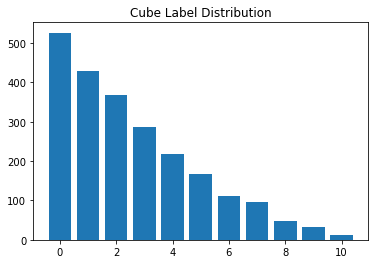

In [17]:
plt.bar(list(range(11)),cube_labels)
plt.title("Cube Label Distribution")

<BarContainer object of 11 artists>

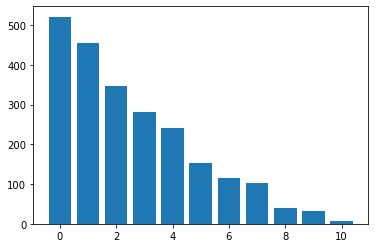

In [18]:
plt.bar(list(range(11)),sphere_labels)

<BarContainer object of 11 artists>

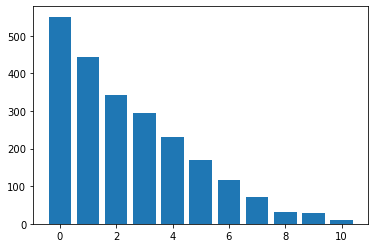

In [19]:
plt.bar(list(range(11)),cylinder_labels)



In [11]:
from itertools import product
res = [ele for ele in product(range(0,11), repeat=3)]

In [13]:
len(res)

1331

In [14]:
restricted_res = [x for x in res if sum(x) <= 10]

In [15]:
len(restricted_res)

286

In [19]:
cube_labels = [0] * 11
cylinder_labels = [0] * 11
sphere_labels = [0] * 11

for lbl in restricted_res:
    cube_labels[lbl[0]] += 1
    cylinder_labels[lbl[1]] += 1
    sphere_labels[lbl[2]] += 1

<BarContainer object of 11 artists>

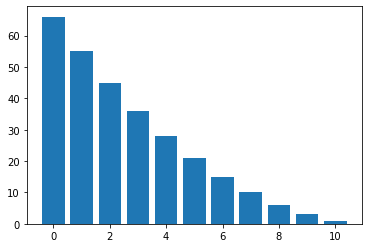

In [24]:
plt.bar(list(range(11)),cube_labels)

In [25]:
np.random.choice(restricted_res)

ValueError: a must be 1-dimensional

In [40]:
restricted_res[np.random.randint(0, len(restricted_res))]

(3, 6, 0)